# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
# from urllib.request import urlopen
# import random
# import re
# import scrapy

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [2]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [3]:
html = req.get(url).content

In [4]:
len(html)

465591

In [5]:
soup = bs(html, 'html.parser')

In [6]:
type(soup)

bs4.BeautifulSoup

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [7]:
name=soup.find_all("h1", class_="h3 lh-condensed")[0].text.strip()
name

'Ismail Pelaseyed'

In [8]:
nickname= soup.find_all("a", class_="Link--secondary Link")[0].text.strip()
nickname

'homanp'

In [9]:
nickname = soup.find_all("a", class_="Link--secondary Link")[0].text.strip()
name = soup.find_all("h1", class_="h3 lh-condensed")[0].text.strip()

final=[]

for elemento in [name, nickname]:
    final.append(elemento)

print(final)


['Ismail Pelaseyed', 'homanp']


In [10]:
name_= []
for e in range(len(soup.find_all("h1", class_="h3 lh-condensed"))):
    name_.append(soup.find_all("h1", class_="h3 lh-condensed")[e].text.strip())
name_

['Ismail Pelaseyed',
 'Chris Banes',
 'Travis Cline',
 'Xiaoyu Zhang',
 'Stefan Prodan',
 'Pedro Cattori',
 'lllyasviel',
 'Arvin Xu',
 'Howard Wu',
 'Shahed Nasser',
 'Kailash Nadh',
 'Mattt',
 'kixelated',
 'Brad Fitzpatrick',
 'Miško Hevery',
 'Andrew Lock',
 'Brian Smith',
 'Numan',
 'Fons van der Plas',
 'Leonid Bugaev',
 'wū yāng',
 'Steven Nguyen',
 'Argo Zhang',
 'Josh Stein',
 'Mike McNeil']

In [11]:
nickname_= []
for e in range(len(soup.find_all("a", class_="Link--secondary Link"))):
    nickname_.append(soup.find_all("a", class_="Link--secondary Link")[e].text.strip())
nickname_

['homanp',
 'chrisbanes',
 'tmc',
 'BBuf',
 'stefanprodan',
 'pcattori',
 'arvinxx',
 'howardwu',
 'shahednasser',
 'knadh',
 'mattt',
 'bradfitz',
 'mhevery',
 'andrewlock',
 'briansmith',
 'numandev1',
 'fonsp',
 'buger',
 'uyarn',
 'stnguyen90',
 'ArgoZhang',
 'jcstein',
 'mikermcneil']

In [12]:
datos_combinados = [f'{nombre} ({nickname})' for nombre, nickname in zip(name_, nickname_)]
datos_combinados

['Ismail Pelaseyed (homanp)',
 'Chris Banes (chrisbanes)',
 'Travis Cline (tmc)',
 'Xiaoyu Zhang (BBuf)',
 'Stefan Prodan (stefanprodan)',
 'Pedro Cattori (pcattori)',
 'lllyasviel (arvinxx)',
 'Arvin Xu (howardwu)',
 'Howard Wu (shahednasser)',
 'Shahed Nasser (knadh)',
 'Kailash Nadh (mattt)',
 'Mattt (bradfitz)',
 'kixelated (mhevery)',
 'Brad Fitzpatrick (andrewlock)',
 'Miško Hevery (briansmith)',
 'Andrew Lock (numandev1)',
 'Brian Smith (fonsp)',
 'Numan (buger)',
 'Fons van der Plas (uyarn)',
 'Leonid Bugaev (stnguyen90)',
 'wū yāng (ArgoZhang)',
 'Steven Nguyen (jcstein)',
 'Argo Zhang (mikermcneil)']

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [13]:
# This is the url you will scrape in this exercise
url2 = 'https://github.com/trending/python?since=daily'

In [14]:
html2 = req.get(url2).content
html2

b'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"  data-a11y-animated-images="system" data-a11y-link-underlines="true">\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-b92e9647318f.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-5d486a4ede8e.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" 

In [15]:
len(html2)

655948

In [16]:
soup2= bs(html2, 'html.parser')
type(soup2)

bs4.BeautifulSoup

In [17]:
trending= soup2.find_all("h2" , class_="h3 lh-condensed")
trending[0].text.strip().replace("\n\n      ", "")

'swisskyrepo /PayloadsAllTheThings'

In [18]:
trending_resultado = []
for e in range(len(trending)):
    x= trending[e].text.strip().replace("\n\n      ", "")
    trending_resultado.append(x)
trending_resultado
    

['swisskyrepo /PayloadsAllTheThings',
 'THUDM /ChatGLM3',
 'PaddlePaddle /PaddleOCR',
 'langchain-ai /langchain',
 'dataelement /bisheng',
 'Azure /MS-AMP',
 'xxlong0 /Wonder3D',
 'yunjey /pytorch-tutorial',
 'facebookresearch /llama',
 'localstack /localstack',
 'OpenBMB /ChatDev',
 'ray-project /ray',
 'CycodeLabs /raven',
 'ageitgey /face_recognition',
 'iam-veeramalla /aws-devops-zero-to-hero',
 'openai /whisper',
 'sqlfluff /sqlfluff',
 'imartinez /privateGPT',
 'reflex-dev /reflex',
 'donnemartin /system-design-primer',
 'lm-sys /FastChat',
 'togethercomputer /RedPajama-Data',
 'SkyworkAI /Skywork',
 'microsoft /qlib',
 'pathwaycom /llm-app']

#### Display all the image links from Walt Disney wikipedia page

In [19]:
# This is the url you will scrape in this exercise
url3 = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [20]:
html3=req.get(url3).content
html3

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Walt Disney - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-cl

In [21]:
len(html3)

582596

In [22]:
soup3=bs(html3, 'html.parser')
type(soup3)

bs4.BeautifulSoup

In [23]:
disney= soup3.find_all("img")
disney[0]


<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>

In [24]:
disney_imagenes = [e.attrs['src'] for e in disney]
disney_imagenes

['/static/images/icons/wikipedia.png',
 '/static/images/mobile/copyright/wikipedia-wordmark-en.svg',
 '/static/images/mobile/copyright/wikipedia-tagline-en.svg',
 '//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG',
 '//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg',
 '//upload.wikimedia.org/wikipedia/en/thumb/4/4e/Steamboat-willie.jpg/22

In [25]:
from IPython.display import Image
for e in disney_imagenes:
    display(Image(url=e))

# Muestra la imagen en el Jupyter Notebook


#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [26]:
# This is the url you will scrape in this exercise
url4 ='https://en.wikipedia.org/wiki/Python' 

In [27]:
html4= req.get(url4).content
html4

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Python - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientp

In [28]:
soup4 = bs(html4, 'html.parser')
type(soup4)

bs4.BeautifulSoup

In [29]:
python = soup4.find_all("a")
python

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en" title="Support us by donating to the Wikimedia Foundation"><span>Donate</span></a>,
 <a href=

In [30]:
python[0].attrs

{'class': ['mw-jump-link'], 'href': '#bodyContent'}

In [31]:
links_python= [e.attrs['href'] for e in python if '#' not in e.attrs['href']]
links_python

['/wiki/Main_Page',
 '/wiki/Wikipedia:Contents',
 '/wiki/Portal:Current_events',
 '/wiki/Special:Random',
 '/wiki/Wikipedia:About',
 '//en.wikipedia.org/wiki/Wikipedia:Contact_us',
 'https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en',
 '/wiki/Help:Contents',
 '/wiki/Help:Introduction',
 '/wiki/Wikipedia:Community_portal',
 '/wiki/Special:RecentChanges',
 '/wiki/Wikipedia:File_upload_wizard',
 '/wiki/Main_Page',
 '/wiki/Special:Search',
 '/w/index.php?title=Special:CreateAccount&returnto=Python',
 '/w/index.php?title=Special:UserLogin&returnto=Python',
 '/w/index.php?title=Special:CreateAccount&returnto=Python',
 '/w/index.php?title=Special:UserLogin&returnto=Python',
 '/wiki/Help:Introduction',
 '/wiki/Special:MyContributions',
 '/wiki/Special:MyTalk',
 'https://af.wikipedia.org/wiki/Python',
 'https://als.wikipedia.org/wiki/Python',
 'https://ar.wikipedia.org/wiki/%D8%A8%D8%A7%D9%8A%D8%AB%D9

#### Number of Titles that have changed in the United States Code since its last release point 

In [32]:
# This is the url you will scrape in this exercise
url5 = 'http://uscode.house.gov/download/download.shtml'

In [33]:
html5 = req.get(url5).content
html5

b'<?xml version=\'1.0\' encoding=\'UTF-8\' ?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml"><head>\n        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n        <meta http-equiv="X-UA-Compatible" content="IE=8" />\n        <meta http-equiv="pragma" content="no-cache" /><!-- HTTP 1.0 -->\n        <meta http-equiv="cache-control" content="no-cache,must-revalidate" /><!-- HTTP 1.1 -->\n        <meta http-equiv="expires" content="0" />\n        <link rel="shortcut icon" href="/javax.faces.resource/favicon.ico.xhtml?ln=images" /><link type="text/css" rel="stylesheet" href="/javax.faces.resource/cssLayout.css.xhtml?ln=css" /><script type="text/javascript" src="/javax.faces.resource/jsf.js.xhtml?ln=javax.faces"></script><link type="text/css" rel="stylesheet" href="/javax.faces.resource/static.css.xhtml?ln=css" /></head><body style="display:none;"><

In [34]:
soup5 = bs(html5, 'html.parser')
type(soup5)

bs4.BeautifulSoup

In [135]:
title= soup5.find_all("div", class_="usctitlechanged")
title[1].text.strip().replace("٭", "")

"Title 38 - Veterans' Benefits "

In [70]:
title_name=[]
for e in range(len(title)):
    x= title[e].text.strip().replace("٭", "")
    title_name.append(x)
title_name

['Title 20 - Education', "Title 38 - Veterans' Benefits "]

In [71]:
len(title_name)

2

#### A Python list with the top ten FBI's Most Wanted names

In [76]:
# This is the url you will scrape in this exercise
url6 = 'https://www.fbi.gov/wanted/topten'

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<!-- saved from url=(0023)http://kidmondo.com/404 -->\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n  \n  <meta http-equiv="imagetoolbar" content="no" />\n  <meta name="robots" content="noindex,nofollow" />\n  <title>There was an Error </title>\n\n\t\t<style>body{background:#fff;margin:0;padding:20px;text-align:center;font-family:Arial,Helvetica,sans-serif;font-size:14px;color:#666}.error_page{width:600px;padding:50px;margin:auto}.error_page h1{margin:20px 0 0}.error_page p{margin:10px 0;padding:0}a{color:#9caa6d;text-decoration:none}a:hover{color:#9caa6d;text-decoration:underline}</style>\n\n\n</head>\n\n<body>\n  <div class="error_page">\n    \n    <h1>We\'re sorry...</h1>\n    <p>The page you are looking for had an error. </p>\n    <div class="cf-error-details cf-error-1020"
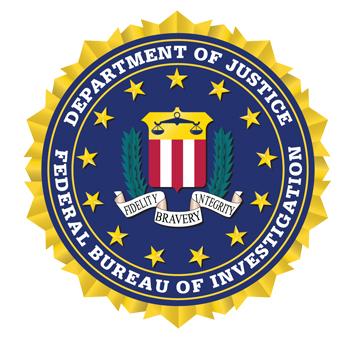

In [77]:
html6 = req.get(url6).content
html6

In [78]:
soup6 = bs(html6, 'html.parser')
type(soup6)

bs4.BeautifulSoup

In [83]:
fbi = soup6.find_all("h3", class_= "title")
fbi

[]

In [133]:
fbi = soup6.find_all("li", class_= "portal-type-person castle-grid-block-item")
fbi

[]

In [216]:
#No se puede acceder con BeautifulSoup

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [85]:
# This is the url you will scrape in this exercise
url7 = 'https://www.emsc-csem.org/Earthquake/'

In [ ]:
#No se puede acceder con BeautifulSoup

#### Display the date, days, title, city, country of next 25 hackathon events as a Pandas dataframe table

In [ ]:
# This is the url you will scrape in this exercise
url8 ='https://hackevents.co/hackathons'

In [ ]:
#your code

#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url9 = 'https://twitter.com/'

In [ ]:
#No se puede acceder con BeautifulSoup

#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url10 = 'https://twitter.com/'

In [ ]:
#No se puede acceder con BeautifulSoup

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [87]:
# This is the url you will scrape in this exercise
url11 = 'https://www.wikipedia.org/'

In [88]:
html11= req.get(url11).content
html11

b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/4.0/">\n<style>\n.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-8bb90067.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister

In [106]:
soup11= bs(html11, 'html.parser')
type(soup11)

bs4.BeautifulSoup

In [177]:
wiki = soup11.find_all('div', class_ ='central-featured')
wiki[0]

<div class="central-featured" data-el-section="primary links">
<!-- #1. en.wikipedia.org - 1 719 062 000 views/day -->
<div class="central-featured-lang lang1" dir="ltr" lang="en">
<a class="link-box" data-slogan="The Free Encyclopedia" href="//en.wikipedia.org/" id="js-link-box-en" title="English — Wikipedia — The Free Encyclopedia">
<strong>English</strong>
<small><bdi dir="ltr">6 715 000+</bdi> <span>articles</span></small>
</a>
</div>
<!-- #2. ja.wikipedia.org - 211 317 000 views/day -->
<div class="central-featured-lang lang2" dir="ltr" lang="ja">
<a class="link-box" data-slogan="フリー百科事典" href="//ja.wikipedia.org/" id="js-link-box-ja" title="Nihongo — ウィキペディア — フリー百科事典">
<strong>日本語</strong>
<small><bdi dir="ltr">1 387 000+</bdi> <span>記事</span></small>
</a>
</div>
<!-- #3. es.wikipedia.org - 198 289 000 views/day -->
<div class="central-featured-lang lang3" dir="ltr" lang="es">
<a class="link-box" data-slogan="La enciclopedia libre" href="//es.wikipedia.org/" id="js-link-box-es" 

In [204]:
wiki_idiomas= wiki[0].find_all("strong")
wiki_idiomas

[<strong>English</strong>,
 <strong>日本語</strong>,
 <strong>Español</strong>,
 <strong>Русский</strong>,
 <strong>Deutsch</strong>,
 <strong>Français</strong>,
 <strong>Italiano</strong>,
 <strong>中文</strong>,
 <strong>Português</strong>,
 <strong><bdi dir="rtl">العربية</bdi></strong>]

In [ ]:
#wiki_idiomas= wiki[0].find_all("strong")[4].text
#wiki_idiomas

In [206]:
idiomas=[]
for e in range(len(wiki_idiomas)):
    x= wiki_idiomas[e].text
    idiomas.append(x)
idiomas

['English',
 '日本語',
 'Español',
 'Русский',
 'Deutsch',
 'Français',
 'Italiano',
 '中文',
 'Português',
 'العربية']

In [211]:
wiki_articulos=wiki[0].find_all("small")
wiki_articulos

[<small><bdi dir="ltr">6 715 000+</bdi> <span>articles</span></small>,
 <small><bdi dir="ltr">1 387 000+</bdi> <span>記事</span></small>,
 <small><bdi dir="ltr">1 892 000+</bdi> <span>artículos</span></small>,
 <small><bdi dir="ltr">1 938 000+</bdi> <span>статей</span></small>,
 <small><bdi dir="ltr">2 836 000+</bdi> <span>Artikel</span></small>,
 <small><bdi dir="ltr">2 553 000+</bdi> <span>articles</span></small>,
 <small><bdi dir="ltr">1 826 000+</bdi> <span>voci</span></small>,
 <small><bdi dir="ltr">1 377 000+</bdi> <span class="jscnconv" data-hans="条目" data-hant="條目">条目 / 條目</span></small>,
 <small><bdi dir="ltr">1 109 000+</bdi> <span>artigos</span></small>,
 <small><bdi dir="ltr">1 217 000+</bdi> <span>مقالة</span></small>]

In [226]:
lista= wiki_articulos[0].text.split()
lista

['6', '715', '000+', 'articles']

In [229]:
numero_limpio= ''.join(lista[0:3])
numero_limpio

'6715000+'

In [237]:
articulos=[]
for e in range(len(wiki_articulos)):
    x= wiki_articulos[e].text.split()
    articulos.append(x)
articulos

[['6', '715', '000+', 'articles'],
 ['1', '387', '000+', '記事'],
 ['1', '892', '000+', 'artículos'],
 ['1', '938', '000+', 'статей'],
 ['2', '836', '000+', 'Artikel'],
 ['2', '553', '000+', 'articles'],
 ['1', '826', '000+', 'voci'],
 ['1', '377', '000+', '条目', '/', '條目'],
 ['1', '109', '000+', 'artigos'],
 ['1', '217', '000+', 'مقالة']]

In [249]:
articulos=[]

for k,v in dic.items():
    v = "".join(v[0:3])
    dic[k]=v
    
dic

{'English': '6715000+',
 '日本語': '1387000+',
 'Español': '1892000+',
 'Русский': '1938000+',
 'Deutsch': '2836000+',
 'Français': '2553000+',
 'Italiano': '1826000+',
 '中文': '1377000+',
 'Português': '1109000+',
 'العربية': '1217000+'}

#### A list with the different kind of datasets available in data.gov.uk 

In [ ]:
# This is the url you will scrape in this exercise
url12 = 'https://data.gov.uk/'

In [ ]:
#your code 

#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [ ]:
# This is the url you will scrape in this exercise
url13 = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [ ]:
#your code

### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
#your code

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code

#### Book name,price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
#your code